In [43]:
!pip install matplotlib
!pip install pandas

In [44]:
import matplotlib as plt
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('china_debt_trap.csv')

In [46]:
df.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Expand All | Collapse All    858 non-null    object
 1   YEAR                         858 non-null    int64 
 2   AMOUNT                       858 non-null    object
 3   LENDER                       858 non-null    object
 4   BORROWER                     857 non-null    object
 5   SECTOR                       858 non-null    object
 6   SENSITIVE TERRITORY OVERLAP  858 non-null    object
 7   Country                      858 non-null    object
dtypes: int64(1), object(7)
memory usage: 53.8+ KB


In [48]:
df.tail()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
853,Zalingei-El Geneinah Road Construction,2009,$120M,ExImBank,Government,Transport,None Known,Sudan
854,Zanzibar Airport Terminal 2 Expansion,2010,$73M,ExImBank,Government,Transport,None Known,Tanzania
855,Zemun-Borca bridge,2009,$217M,ExImBank,Government,Transport,None Known,Serbia
856,Zongo II Hydropower Station,2011,$367M,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"
857,Zungeru Hydropower Plant Project,2013,$984M,ExImBank,Government,Power,Within Indigenous Peoples' Lands,Nigeria


In [49]:
#list all countries
df['Country'].unique()

array(['Angola', 'Brazil', 'Suriname', 'Cambodia', 'Kenya',
       'Congo, Democratic Republic of the', 'Laos', 'Bangladesh',
       'Nigeria', 'Benin', 'Zambia', 'Bahamas', "Cote d'Ivoire",
       'Ethiopia', 'Djibouti', 'Indonesia', 'Togo', 'Philippines',
       'Myanmar', 'Mozambique', 'Eritrea', 'Ukraine', 'South Sudan',
       'Sudan', 'Kyrgyz Republic', 'Uzbekistan', 'Ecuador', 'Mauritania',
       'Kazakhstan', 'Jordan', 'Niger', 'Mauritius', 'Pakistan', 'Mali',
       'Hungary', 'Serbia', 'Belarus', 'Morocco', 'Regional', 'Malawi',
       'Egypt', 'Tanzania', 'Congo, Republic of the', 'Fiji', 'Nepal',
       'Rwanda', 'Ghana', 'Senegal', 'Sri Lanka', 'Argentina', 'Guyana',
       'Trinidad and Tobago', 'Maldives', 'Bolivia', 'Vietnam', 'Gabon',
       'Montenegro', 'Papua New Guinea', 'Samoa', 'Iran', 'Cameroon',
       'Venezuela', 'Timor-Leste', 'Peru', 'Tajikistan', 'Malaysia',
       'Dominican Republic', 'Uganda', 'Russian Federation', 'Madagascar',
       'Turkmenistan', 

In [62]:
df.rename(columns={"Expand All | Collapse All": "Title"})

,Title,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,50000000,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,7000000000,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,47000000,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,475000000,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,600000000,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya
...,...,...,...,...,...,...,...,...
853,Zalingei-El Geneinah Road Construction,2009,120000000,ExImBank,Government,Transport,None Known,Sudan
854,Zanzibar Airport Terminal 2 Expansion,2010,73000000,ExImBank,Government,Transport,None Known,Tanzania
855,Zemun-Borca bridge,2009,217000000,ExImBank,Government,Transport,None Known,Serbia
856,Zongo II Hydropower Station,2011,367000000,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"


In [65]:
#range of the data in years
df["YEAR"].value_counts()

2016    133
2011    106
2013     91
2012     86
2015     79
2017     75
2009     70
2014     70
2010     58
2018     45
2008     40
2019      5
Name: YEAR, dtype: int64

In [59]:
def convert_monetary_string(monetary_string):
    if monetary_string[-1] == 'K':
        return int(float(monetary_string[1:-1]) * 1000)
    elif monetary_string[-1] == 'M':
        return int(float(monetary_string[1:-1]) * 1000000)
    elif monetary_string[-1] == 'B':
        return int(float(monetary_string[1:-1]) * 1000000000)
    else:
        return int(monetary_string[1:])

In [60]:
df["AMOUNT"] = df["AMOUNT"].apply(convert_monetary_string)
df

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,50000000,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,7000000000,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,47000000,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,475000000,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,600000000,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya
...,...,...,...,...,...,...,...,...
853,Zalingei-El Geneinah Road Construction,2009,120000000,ExImBank,Government,Transport,None Known,Sudan
854,Zanzibar Airport Terminal 2 Expansion,2010,73000000,ExImBank,Government,Transport,None Known,Tanzania
855,Zemun-Borca bridge,2009,217000000,ExImBank,Government,Transport,None Known,Serbia
856,Zongo II Hydropower Station,2011,367000000,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"


<Axes: ylabel='AMOUNT'>

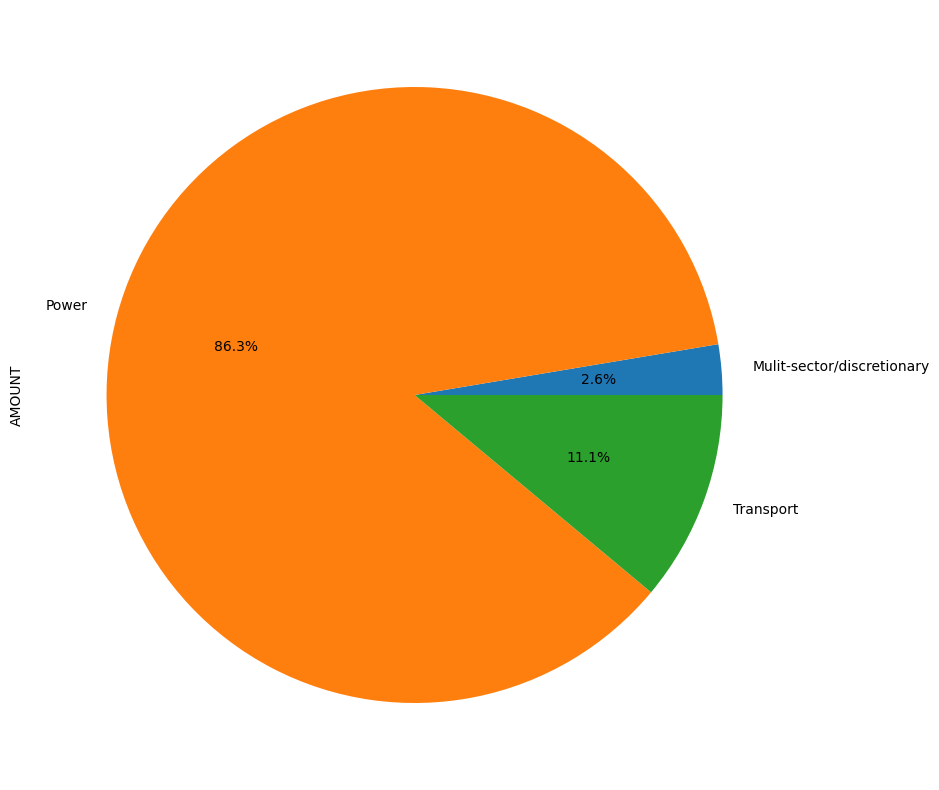

In [67]:
#make a pie chart of the total amount of debt by each sector in the year 2019
df_2019 = df[df["YEAR"] == 2019]
df_2019.groupby('SECTOR')['AMOUNT'].sum().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
#df.groupby('SECTOR')['AMOUNT'].sum().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')


<Axes: xlabel='YEAR'>

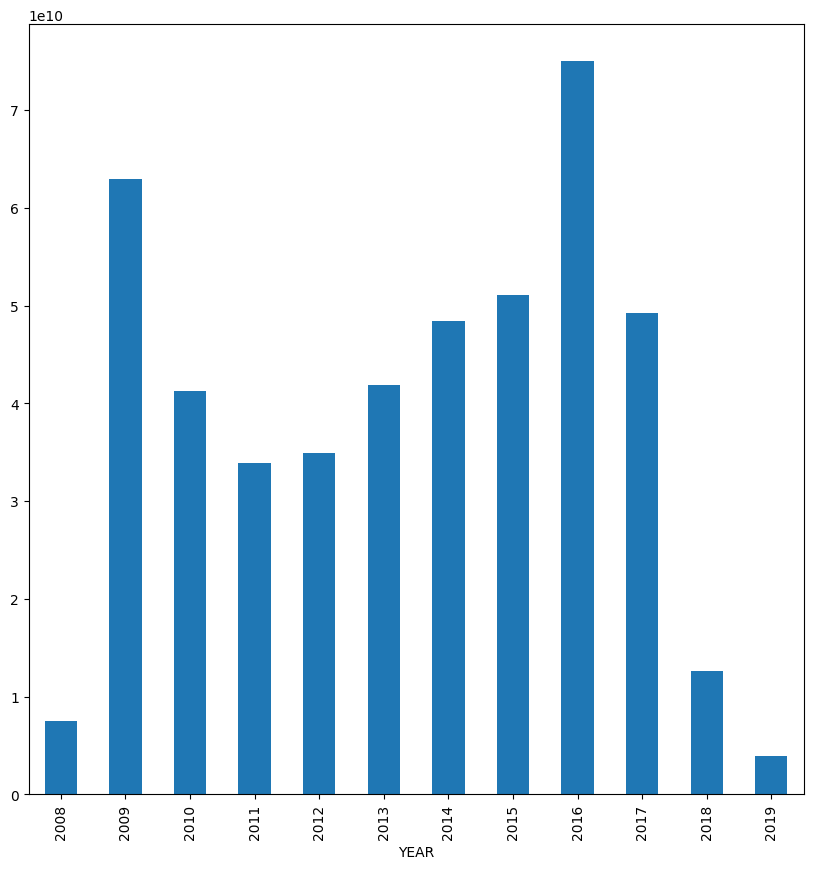

In [69]:
#make a bar graph for year and amount of debt
df.groupby('YEAR')['AMOUNT'].sum().plot(kind='bar', figsize=(10,10))